In [88]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [89]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [90]:
# normalize

In [91]:
clean_features = data[data.columns[:-1]]


In [92]:
from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(clean_features)
# df_normalized = pd.DataFrame(np_scaled)

df_normalized = clean_features

In [93]:
df_normalized.columns = clean_features.columns

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_normalized, data['target'], test_size=0.33, random_state=42)

In [95]:
import matplotlib.pyplot as plt

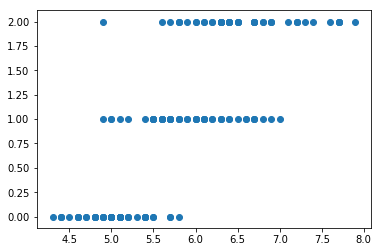

In [96]:
plt.scatter(df_normalized['sepal length (cm)'], data['target'])
plt.show()

In [97]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

/Users/joseph/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.97999999999999998

In [103]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

1.0

In [99]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [100]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.97999999999999998

In [101]:
from sklearn import tree
i_tree = 0
for tree_in_forest in rfc.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
    i_tree = i_tree + 1

In [102]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
abc.score(X_test, y_test)

0.92000000000000004